gIn this notebook, I will automate the performance recording of the individual models.
This will also automate the graphs as well.

In [1]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import model.model_setup as ms
import model.temporary.testing_k_folds as tk
from model.multi_models import ModelWrapper, get_model_wrapper_list

random_state = 1
test_size = 0.25

student_data = ms.get_student_data('../../data/data.csv', bin=False)
features = ["A8", "Has_504", "Student on Free or Reduced Lunch", "IEP/Specialized"]

models = [RandomForestClassifier(random_state=1),
          AdaBoostClassifier(random_state=1),
          LogisticRegression(),
          SVC(random_state=1, probability=True)]

model_wrapper_list = get_model_wrapper_list(models,
                                            student_data[features],
                                            student_data['ChronicallyAbsent_in_HS'],
                                            random_state=random_state,
                                            test_size=test_size)

for i in model_wrapper_list:
    i.fit()
    print(i.results["y_test"].value_counts())

Number of students on reduced lunch: 23
<class 'pandas.core.frame.DataFrame'>
Scoring used:  recall
Best parameters:  {}
Best/Mean score using best parameters:  0.3666666666666666
False    11
True      9
Name: ChronicallyAbsent_in_HS, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Scoring used:  recall
Best parameters:  {}
Best/Mean score using best parameters:  0.4333333333333333
False    11
True      9
Name: ChronicallyAbsent_in_HS, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Scoring used:  recall
Best parameters:  {}
Best/Mean score using best parameters:  0.4999999999999999
False    11
True      9
Name: ChronicallyAbsent_in_HS, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Scoring used:  recall
Best parameters:  {}
Best/Mean score using best parameters:  0.4999999999999999
False    11
True      9
Name: ChronicallyAbsent_in_HS, dtype: int64



AUC of RandomForestClassifier: 0.904

AUC of AdaBoostClassifier: 0.879

AUC of LogisticRegression: 0.869

AUC of SVC: 0.848
[[10  1]
 [ 1  8]]
0.9
[[10  1]
 [ 2  7]]
0.85
[[10  1]
 [ 3  6]]
0.8
[[10  1]
 [ 3  6]]
0.8


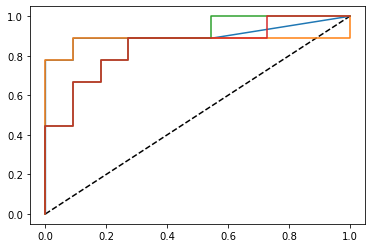

In [2]:
import matplotlib.pyplot as plt

plt.plot([0,1], [0,1], 'k--')

for model in model_wrapper_list:
    plt.plot(*model.get_roc_curve())

for i in model_wrapper_list:
    print(i.results["matrix"])
    print(i.results["accuracy"])

    """

    TEST SIZE: 0.3
    RANDOM STATE=1
    AUC of RandomForestClassifier: 0.857

AUC of AdaBoostClassifier: 0.871

AUC of LogisticRegression: 0.850
[[12  2]
 [ 2  8]]
0.8333333333333334
[[12  2]
 [ 4  6]]
0.75
[[12  2]
 [ 4  6]]
0.75
"""


AUC of RandomForestClassifier: 0.904

AUC of AdaBoostClassifier: 0.879

AUC of LogisticRegression: 0.869

AUC of SVC: 0.848
[[10  1]
 [ 1  8]]
0.9
[[10  1]
 [ 2  7]]
0.85
[[10  1]
 [ 3  6]]
0.8
[[10  1]
 [ 3  6]]
0.8


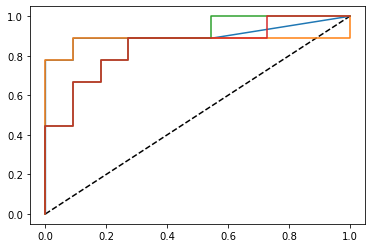

In [3]:
import matplotlib.pyplot as plt

plt.plot([0,1], [0,1], 'k--')

for model in model_wrapper_list:
    plt.plot(*model.get_roc_curve())

for i in model_wrapper_list:
    print(i.results["matrix"])
    print(i.results["accuracy"])

    """

    TEST SIZE: 0.3
    RANDOM STATE=1
    AUC of RandomForestClassifier: 0.857

AUC of AdaBoostClassifier: 0.871

AUC of LogisticRegression: 0.850
[[12  2]
 [ 2  8]]
0.8333333333333334
[[12  2]
 [ 4  6]]
0.75
[[12  2]
 [ 4  6]]
0.75
"""


AUC of RandomForestClassifier: 0.904

AUC of AdaBoostClassifier: 0.879

AUC of LogisticRegression: 0.869

AUC of SVC: 0.848
[[10  1]
 [ 1  8]]
0.9
[[10  1]
 [ 2  7]]
0.85
[[10  1]
 [ 3  6]]
0.8
[[10  1]
 [ 3  6]]
0.8


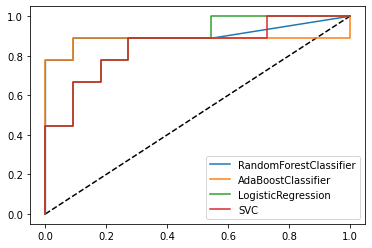

In [4]:
import matplotlib.pyplot as plt

plt.plot([0,1], [0,1], 'k--')

for model in model_wrapper_list:
    plt.plot(*model.get_roc_curve(), label=model.model_name)

plt.legend(loc='best')

for i in model_wrapper_list:
    print(i.results["matrix"])
    print(i.results["accuracy"])

    """

    TEST SIZE: 0.3
    RANDOM STATE=1
    AUC of RandomForestClassifier: 0.857

AUC of AdaBoostClassifier: 0.871

AUC of LogisticRegression: 0.850
[[12  2]
 [ 2  8]]
0.8333333333333334
[[12  2]
 [ 4  6]]
0.75
[[12  2]
 [ 4  6]]
0.75
"""

In [5]:
"""
Linear Regression must be bagged in order to get feature importance?
Soren Havelund Welling (https://stats.stackexchange.com/users/49132/soren-havelund-welling), Feature Importance for
Linear Regression, URL (version: 2019-08-21): https://stats.stackexchange.com/q/423094

Try binning your
"""

# Getting feature importance of models
feature_importances_info = {}

for i in model_wrapper_list:
    feature_importances_ = i.model.best_estimator_['model'].feature_importances_
    feature_importances_info[i.model_name] = []

    for feature, importance in zip(i.column_names, feature_importances_):
        feature_importances_info[i.model_name].append((feature, importance))

for i in feature_importances_info["RandomForestClassifier"]:
    print(i)

for i in feature_importances_info["AdaBoostClassifier"]:
    print(i)

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'